# DSSP

Here we calculate the secondary structure of adenylate kinase, using the DSSP algorithm.

**Last executed:** Mar 10, 2020 with MDAnalysis 0.20.2-dev0

**Last updated:** March 2020

**Minimum version of MDAnalysis:** 1.0.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests

**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)


<div class="alert alert-info">
    
**Note**

`MDAnalysis.analysis.secondary_structure.dssp` wraps MDTraj (<a data-cite="mcgibbon_mdtraj_2015" href="https://doi.org/10.1016/j.bpj.2015.08.015">McGibbon *et al.*, 2015</a>) to run the DSSP algorithm (<a data-cite="kabsch_dictionary_1983" href="https://doi.org/10.1002/bip.360221211">Kabsch and Sander, 1983</a>, <a data-cite="touw_series_2015" href="https://doi.org/10.1093/nar/gku1028">Touw *et al.*, 2015</a>). Please cite these sources if you use this module in published work. 

</div>



In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import secondary_structure as ss
%matplotlib inline

## Loading files

The test files we will be working with here are a trajectory of adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u = mda.Universe(TPR, XTC)

## Calculating DSSP

As usual, you can pass in a selection string with `select`. However, the code will try to find the backbone atoms of proteins anyway, by using the provided atom names. These are given as strings -- if there are multiple names given, they are treated in descending order of preference. Here our last residue does not have an oxygen atom called 'O', but rather, 'O1' or 'O2'.

In [3]:
u.residues[213].atoms.names

array(['N', 'H', 'CA', 'HA1', 'HA2', 'C', 'O1', 'O2'], dtype=object)

It is important that the code can find backbone atoms in all residues that should be treated as "protein-like", so we pass 'O O1' to `o_name` below. You can also choose to add your resulting secondary structures as an attribute to the topology, using `add_topology_attr`.

In [4]:
dssp = ss.DSSP(u, select='protein', 
               o_name='O O1',
               n_name='N',
               c_name='C',
               ca_name='CA',
               add_topology_attr=True).run()

The estimated secondary structure of each of your selected residues is in `dssp.ss_codes`.

In [5]:
dssp.ss_codes.shape

(10, 214)

There is also a similar array of estimated secondary structures, but using simplified structure names (so only 'Helix', 'Strand', and 'Coil') at `dssp.ss_simple`.

In [6]:
dssp.ss_simple.shape

(10, 214)

The counts of each structure are available at ``ss_counts`` and ``simple_counts``, for the full array of secondary structures and the simplified versions, respectively. For example, the number of residues involved in helices fluctuates around 100 per frame.

In [7]:
dssp.simple_counts['Helix']

array([107, 102,  97, 100,  97, 109, 100, 102,  97,  99])

The most common structure for each residue can be found at ``ss_mode`` or ``simple_mode``. As shown below, the first residue is usually found as a random coil.

In [8]:
dssp.ss_mode[0]

'C'

It is this most common secondary structure that is added as a topology attribute when you pass `add_topology_attr=True`. This allows you to quickly find which residues are, for example, involved in alpha-helices.

In [9]:
aH = u.residues[u.residues.secondary_structures=='H']
aH.resnames

array(['LYSH', 'GLY', 'THR', 'GLN', 'ALA', 'GLN', 'PHE', 'ILE', 'MET',
       'GLU', 'LYSH', 'TYR', 'ASP', 'MET', 'LEU', 'ARG', 'ALA', 'ALA',
       'VAL', 'LYSH', 'SER', 'GLU', 'LEU', 'GLY', 'LYSH', 'GLN', 'ALA',
       'LYSH', 'ASP', 'ILE', 'MET', 'ASP', 'ALA', 'ASP', 'GLU', 'LEU',
       'VAL', 'ILE', 'ALA', 'LEU', 'VAL', 'LYSH', 'GLU', 'ARG', 'ILE',
       'PRO', 'GLN', 'ALA', 'ASP', 'ALA', 'MET', 'LYSH', 'GLU', 'ASP',
       'GLU', 'LEU', 'ILE', 'VAL', 'ASP', 'ARG', 'ILE', 'VAL', 'GLU',
       'GLU', 'THR', 'VAL', 'ARG', 'LYSH', 'ARG', 'LEU', 'VAL', 'GLU',
       'TYR', 'HISB', 'GLN', 'MET', 'THR', 'ALA', 'PRO', 'LEU', 'ILE',
       'GLY', 'TYR', 'TYR', 'SER', 'LYSH', 'GLU', 'ALA', 'GLU', 'ALA',
       'VAL', 'ALA', 'GLU', 'VAL', 'ARG', 'ALA', 'ASP', 'LEU', 'GLU',
       'LYSH', 'ILE'], dtype=object)

## Plotting

There is a convenience plotting function to quickly visualise the structural content of each frame. You can plot either the normal structures or the simplified versions, and either as a bar or a line graph.

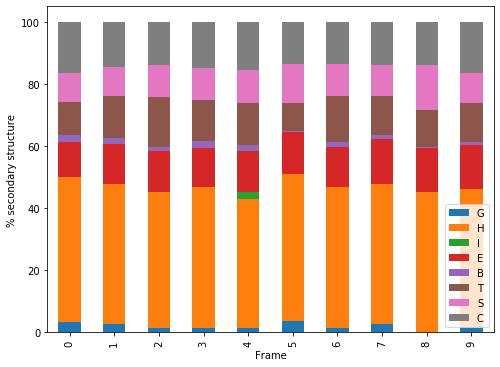

In [10]:
dssp.plot_content(kind='bar', simple=False)

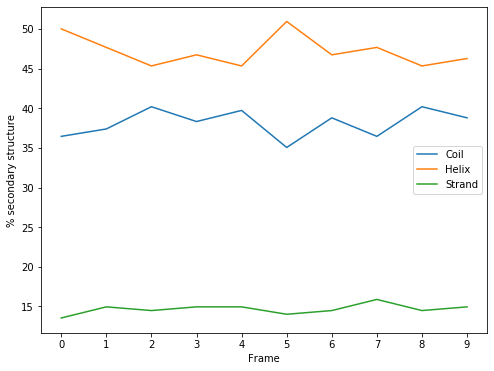

In [11]:
dssp.plot_content(kind='line', simple=True)

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Wolfgang Kabsch and Christian Sander.
Dictionary of protein secondary structure: <span class="bibtex-protected">Pattern</span> recognition of hydrogen-bonded and geometrical features.
<em>Biopolymers</em>, 22(12):2577–2637, 1983.
13849 _eprint: https://onlinelibrary.wiley.com/doi/pdf/10.1002/bip.360221211.
URL: <a href="https://onlinelibrary.wiley.com/doi/abs/10.1002/bip.360221211">https://onlinelibrary.wiley.com/doi/abs/10.1002/bip.360221211</a>, <a href="https://doi.org/10.1002/bip.360221211">doi:10.1002/bip.360221211</a>.

[4] Robert&nbsp;T. McGibbon, Kyle&nbsp;A. Beauchamp, Matthew&nbsp;P. Harrigan, Christoph Klein, Jason&nbsp;M. Swails, Carlos&nbsp;X. Hernández, Christian&nbsp;R. Schwantes, Lee-Ping Wang, Thomas&nbsp;J. Lane, and Vijay&nbsp;S. Pande.
<span class="bibtex-protected">MDTraj</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Modern</span> <span class="bibtex-protected">Open</span> <span class="bibtex-protected">Library</span> for the <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Trajectories</span>.
<em>Biophysical Journal</em>, 109(8):1528–1532, October 2015.
00508.
URL: <a href="http://www.sciencedirect.com/science/article/pii/S0006349515008267">http://www.sciencedirect.com/science/article/pii/S0006349515008267</a>, <a href="https://doi.org/10.1016/j.bpj.2015.08.015">doi:10.1016/j.bpj.2015.08.015</a>.

[5] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.

[6] Wouter&nbsp;G. Touw, Coos Baakman, Jon Black, Tim A.&nbsp;H. te&nbsp;Beek, E.&nbsp;Krieger, Robbie&nbsp;P. Joosten, and Gert Vriend.
A series of <span class="bibtex-protected">PDB</span>-related databanks for everyday needs.
<em>Nucleic Acids Research</em>, 43(D1):D364–D368, January 2015.
00368 Publisher: Oxford Academic.
URL: <a href="https://academic.oup.com/nar/article/43/D1/D364/2435537">https://academic.oup.com/nar/article/43/D1/D364/2435537</a>, <a href="https://doi.org/10.1093/nar/gku1028">doi:10.1093/nar/gku1028</a>.